In [1]:
from XRR import rebin
from GID import GID
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import h5py
import os

In [7]:
FileDir = '/media/egor/82ACE81CACE80D0B/ls3582/id10-surf/20251120/RAW_DATA/DPPC_0PS/DPPC_0PS_0002/'
FileName = 'DPPC_0PS_0002.h5'

ScanN_list = [25]
file = FileDir+FileName

Start loading data.
Loading scan #25
Loaded scan #25
Loading completed. Reading time 0.002 sec
Start processing 2D data.
Processing completed. Processing time 0.001 sec 


Saving standard GID plot.


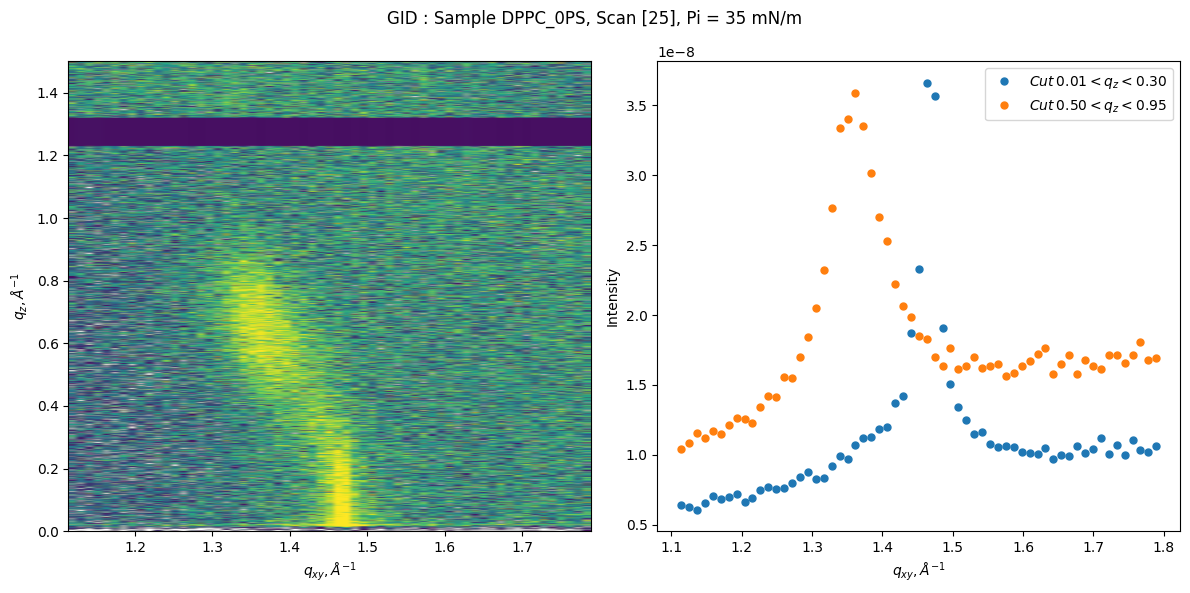

In [8]:
gid = GID(file, ScanN_list, PX0=50, PPD=198.5, mythen_gap=90, I0=2e12)
gid.plot_quick_analysis(save=True)

GID cut saved as: ./DPPC_0PS/GID_DPPC_0PS_scan_[25]_qxy_cut_0_0.4_A.dat
GID cut saved as: ./DPPC_0PS/GID_DPPC_0PS_scan_[25]_qxy_cut_0.5_1_A.dat


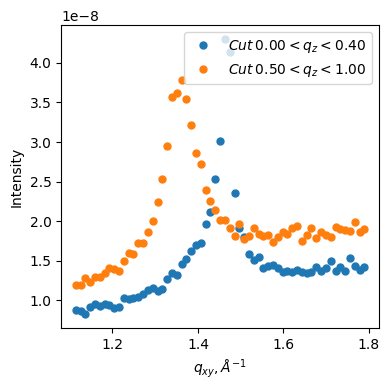

In [9]:
fig, ax = plt.subplots(1,1, figsize=(4,4), layout='tight')
gid.plot_qxy_cut(0, 0.4, ax=ax)            ## plot cut
gid.plot_qxy_cut(0.5, 1, ax=ax)

gid.save_qxy_cut(0, 0.4)                   ## save the same cut as txt file
gid.save_qxy_cut(0.5, 1)

GID cut saved as: ./DPPC_0PS/GID_DPPC_0PS_scan_[25]_qz_cut_1.25_1.4_A.dat


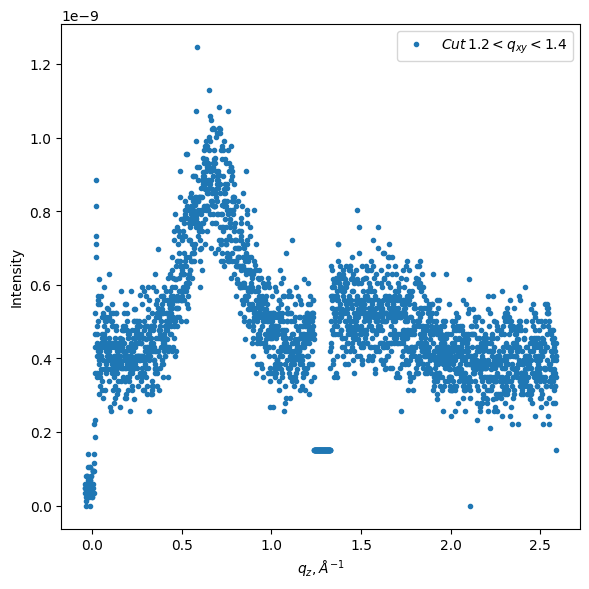

In [10]:
gid.plot_qz_cut(1.25, 1.4)
gid.save_qz_cut(1.25, 1.4)

## Plot only 2D graph to be able to modifiy image

(0.0, 1.5)

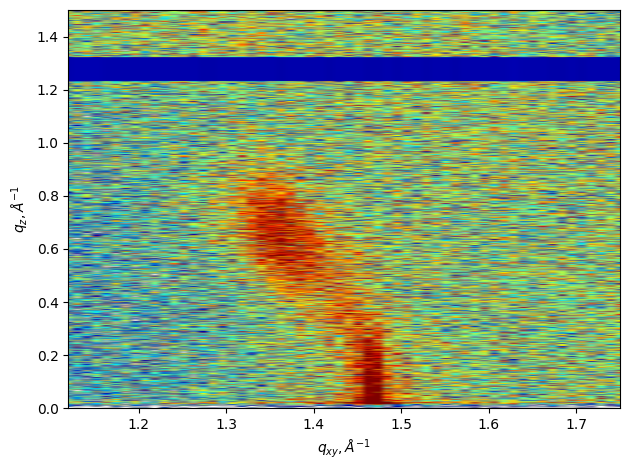

In [11]:
fig, ax = plt.subplots(layout='tight')
gid.plot_2D_image(ax=ax, cmap='jet')   ### this function takes kwargs for imshow
ax.set_xlim((1.12,1.75))
ax.set_ylim(0, 1.5)

### An example of rebinning data to smooth/reduce number of points

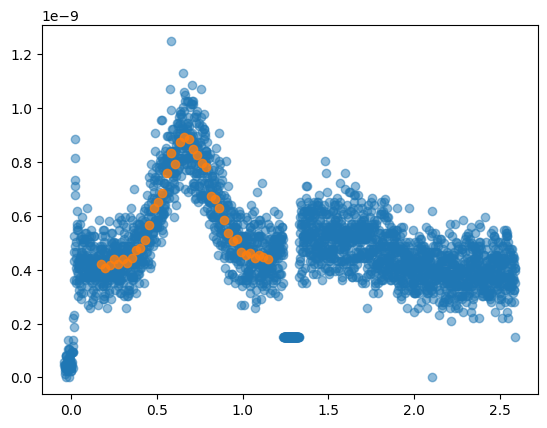

In [12]:
qz, qz_cut  = gid.get_qz_cut(1.25, 1.4)
new_qz, new_qz_cut, new_qz_e = rebin(qz[200:1200], qz_cut[200:1200],np.ones(len(qz[200:1200])), number_of_bins=40)
plt.plot(qz, qz_cut, 'o', alpha=0.5)
plt.plot(new_qz, new_qz_cut, 'o', alpha=0.8)

In [21]:
popt, pcov, fit_func, x_fit, y_fit = gid.fit_profile(*gid.get_qxy_cut(0, 0.3), 'voigt')

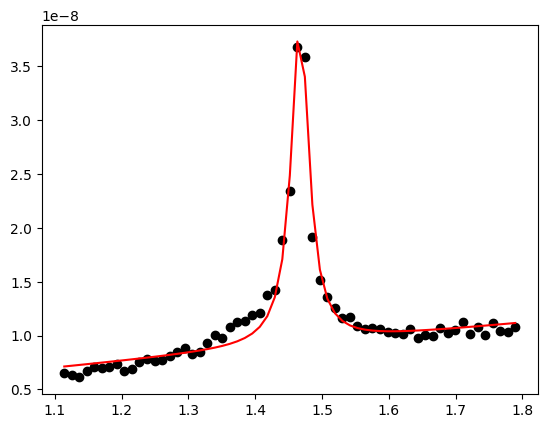

In [22]:
plt.plot(x_fit, y_fit, 'ok')
plt.plot(x_fit, fit_func(x_fit, *popt), 'r-')